In [1]:
from scipy import stats
srcc = stats.spearmanr( [5,8,-1,2], [6,1,9,3])
srcc[0]

-0.7999999999999999

In [2]:
%cd ..


c:\OTHER\ترم 3\پایاننامه\proposal\knowledge distillation\CKDN_code


In [3]:
import predict_one_image



In [4]:
iqa = predict_one_image.IQA_CKDN()

In [5]:
iqa.predict(restored_addr="images1/restored/3.png" , degraded_addr= "images1/degraded/3.png")  # dist , ref

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


0.34153816

In [10]:
dte = iqa.get_DTE_features("images1/restored/3.png")
qse = iqa.get_QSE_features("images1/restored/3.png")
qse_minus = iqa.get_QSE_minus_DTE_features("images1/restored/3.png" , "images1/restored/3.png" )

In [12]:
dte.shape , qse.shape , qse_minus.shape

((1, 256), (1, 256), (1, 256))

## correlation or cosine distance

In [13]:
from scipy import stats
import numpy as np
from scipy.spatial.distance import cosine


r = "S5/test/r.BMP"
d = "S5/test/i04_10_1.bmp"


rr = iqa.get_DTE_features(r)[0]
dd = iqa.get_DTE_features(d)[0]

srcc = stats.spearmanr( rr , dd)
srcc[0] , cosine(rr, dd)

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


(0.999831912336919, 2.3543834686279297e-05)

In [14]:
import glob
TID_ADDR = "C:\OTHER\\term2\seminars\papers\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\datasets\TID2013"
dsts = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24"]


def get_images_dst(dst_type):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*_'+ dst_type +'_'+ '*' +'.*')
    return imgs

def get_mos_dst(dst_type ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1].split('_')[1] == dst_type:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


refs = glob.glob(TID_ADDR+'/reference_images/*')

refs_for_dst = []

for elem in refs:
    for i in range(5):
        refs_for_dst.append(elem)

In [15]:
len(get_images_dst(dsts[7])) , len(refs_for_dst) , len(get_mos_dst(dsts[7]))

(125, 125, 125)

In [16]:
get_images_dst(dsts[7])[107]

'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\i22_08_3.bmp'

In [17]:
refs_for_dst[107]

'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/reference_images\\I22.BMP'

In [18]:
get_mos_dst(dsts[7])[107]

3.783

## test_on_tid_dist

In [64]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('test_on_tid_dist.xlsx')
worksheet = workbook.add_worksheet()

In [65]:
row = 3

preds = []
for c in dsts:
    imgs = get_images_dst(c)
    refs = refs_for_dst
    preds_on_dists = []
    moses = get_mos_dst(c)
    for i in range(len(imgs)):
        score = iqa.predict(imgs[i] , refs[i])
        preds_on_dists.append(score)
        preds.append(score)
       

    worksheet.write(row, 3,  c)
    worksheet.write(row, 4,  stats.spearmanr( preds_on_dists , moses)[0])

    
    print(row)
    row +=1

workbook.close()      

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


## mos on all imgs

In [66]:
imgs = []
refs = []
moses = []
for c in dsts:
    imgs += get_images_dst(c)
    refs += refs_for_dst
    moses += get_mos_dst(c)

In [67]:
preds = []
for i in range(len(imgs)):
    rr = iqa.predict(imgs[i] , refs[i])
    preds.append(rr)
    
   




len(preds) , len(moses)


c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


(3000, 3000)

In [68]:
stats.spearmanr( preds , moses)[0]

0.5740042107733865

## on contents

In [19]:
contents = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24","25"]


def get_images_content(im_name):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*'+im_name+'_'+ '*' +'_'+ '*' +'.*')
    return imgs

def get_mos_content(im_name ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1][1:3] == im_name:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


def get_refs_content(content):
        return glob.glob(TID_ADDR+'/reference_images/*'+content+'*') * 120

In [15]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('test_on_tid-content.xlsx')
worksheet = workbook.add_worksheet()

In [72]:
row = 3


for c in contents:
    imgs = get_images_content(c)
    refs = get_refs_content(c)
    preds = []
    moses = get_mos_content(c)
    for i in range(len(imgs)):
        rr = iqa.predict(imgs[i] , refs[i])
        
        preds.append(rr)

    worksheet.write(row, 3,  c)
    worksheet.write(row, 4,  stats.spearmanr( preds , moses)[0])

    
    print(row)
    row +=1

workbook.close() 

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


## on all imgs:

In [79]:
imgs = []
refs = []
moses = []
for c in contents:
    imgs += get_images_content(c)
    refs += get_refs_content(c)
    moses += get_mos_content(c)

In [80]:
cosines = []
for i in range(len(imgs)):
    rr = iqa.predict(imgs[i] , refs[i])
    
    cosines.append(rr)



In [81]:
len(cosines) , len(moses)

(3000, 3000)

In [82]:
stats.spearmanr( cosines , moses)[0]

0.22885525717920874

## dst visualize

In [18]:
row = 3


features = []
dists = []

for c in dsts:
    imgs = get_images_dst(c)
    for i in range(len(imgs)):
        dd = iqa.get_DTE_features(imgs[i])[0]
        features.append(dd)
        dists.append(int(c))
        

  

    
    print(row)
    row +=1



features = np.array(features)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [19]:
features.shape

(3000, 256)

## content visualize with references(DTE)


In [20]:
import numpy as np 

row = 3

features1 = []
contnts = []
is_ref = []
for c in contents:
    
    imgs = get_images_content(c)

    for i in range(len(imgs)):
        dd = iqa.get_DTE_features(imgs[i])[0]
        features1.append(dd)
        contnts.append(c)
        is_ref.append("0")

    ref = get_refs_content(c)[0]
    dd = iqa.get_DTE_features(ref)[0]
    features1.append(dd)
    contnts.append(c)
    is_ref.append("1")

  

    
    print(row)
    row +=1



features1 = np.array(features1)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [21]:
features1.shape , len(contnts) , len(is_ref)

((3025, 256), 3025, 3025)

<AxesSubplot:xlabel='1', ylabel='2'>

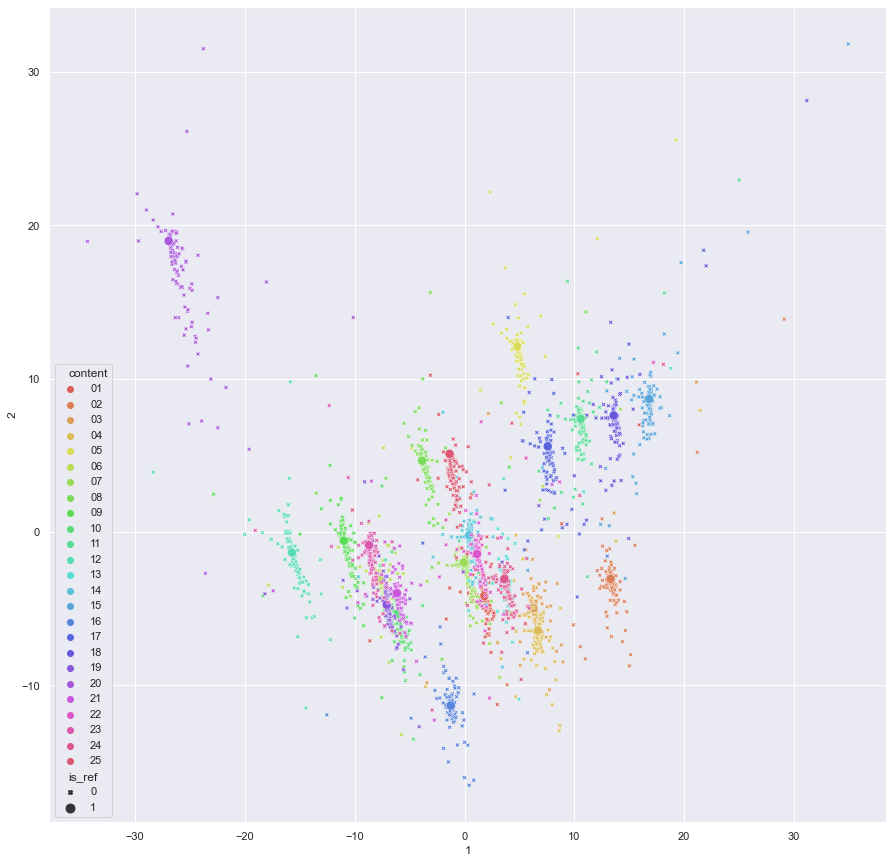

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

<AxesSubplot:xlabel='1', ylabel='2'>

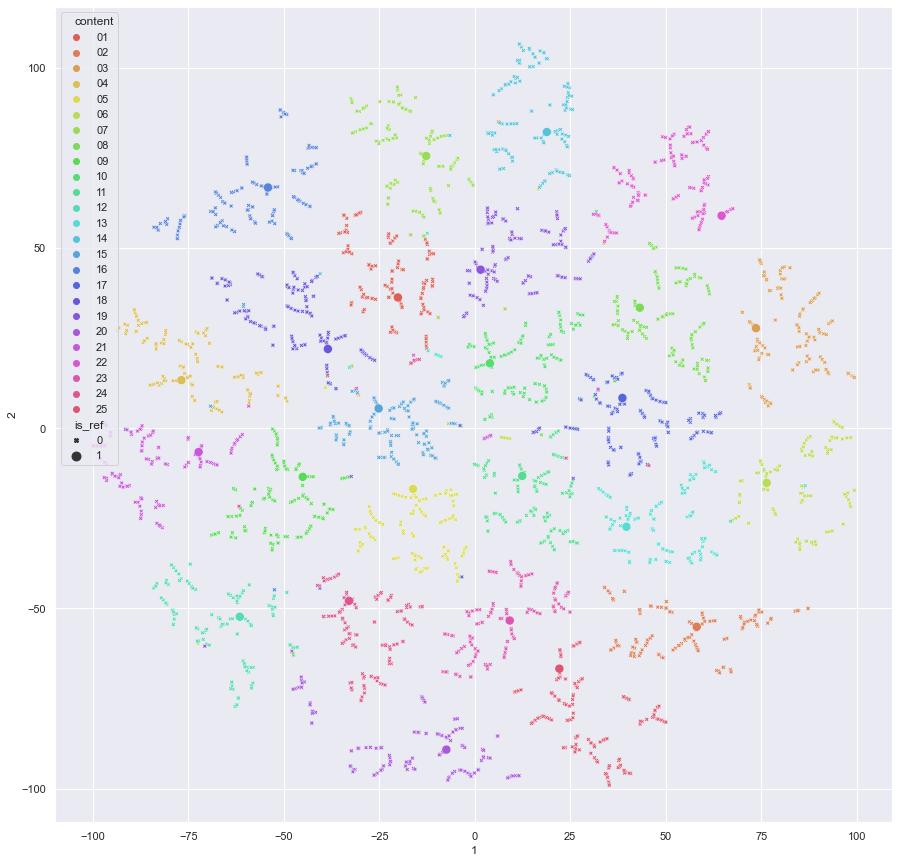

In [25]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

## visulize QSE features

In [33]:
import numpy as np 

row = 3

features1 = []
contnts = []
is_ref = []
for c in contents:
    
    imgs = get_images_content(c)

    for i in range(len(imgs)):
        dd = iqa.get_QSE_features(imgs[i])[0]
        features1.append(dd)
        contnts.append(c)
        is_ref.append("0")

    ref = get_refs_content(c)[0]
    dd = iqa.get_QSE_features(ref)[0]
    features1.append(dd)
    contnts.append(c)
    is_ref.append("1")

  

    
    print(row)
    row +=1



features1 = np.array(features1)

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [34]:
features1.shape , len(contnts) , len(is_ref)

((3025, 256), 3025, 3025)

<AxesSubplot:xlabel='1', ylabel='2'>

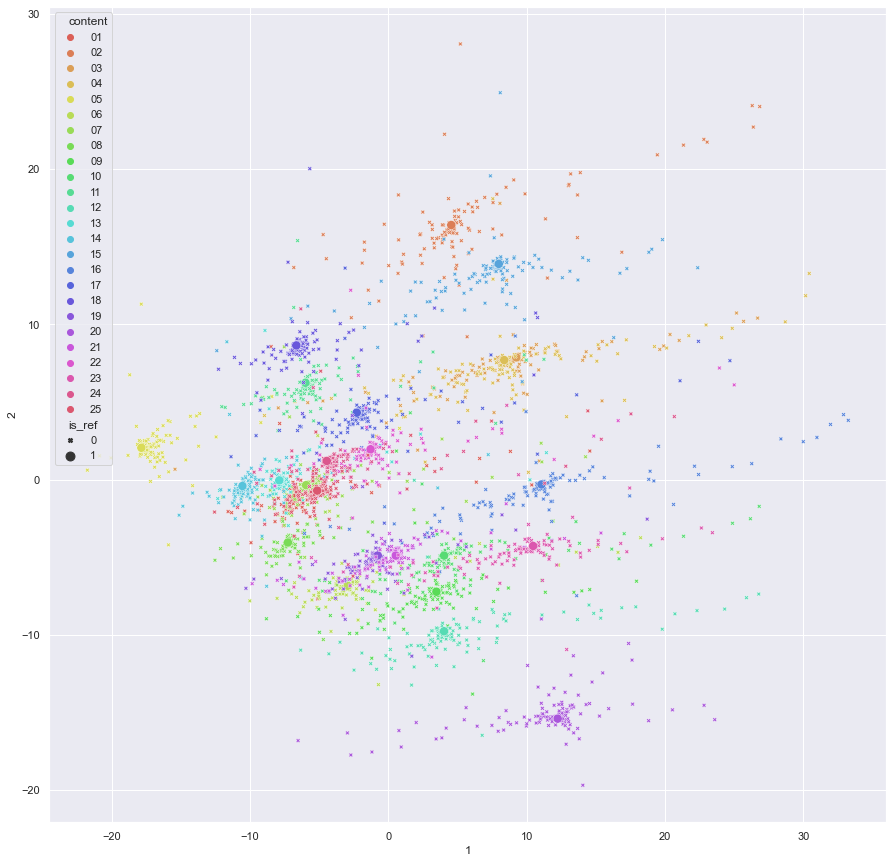

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

<AxesSubplot:xlabel='1', ylabel='2'>

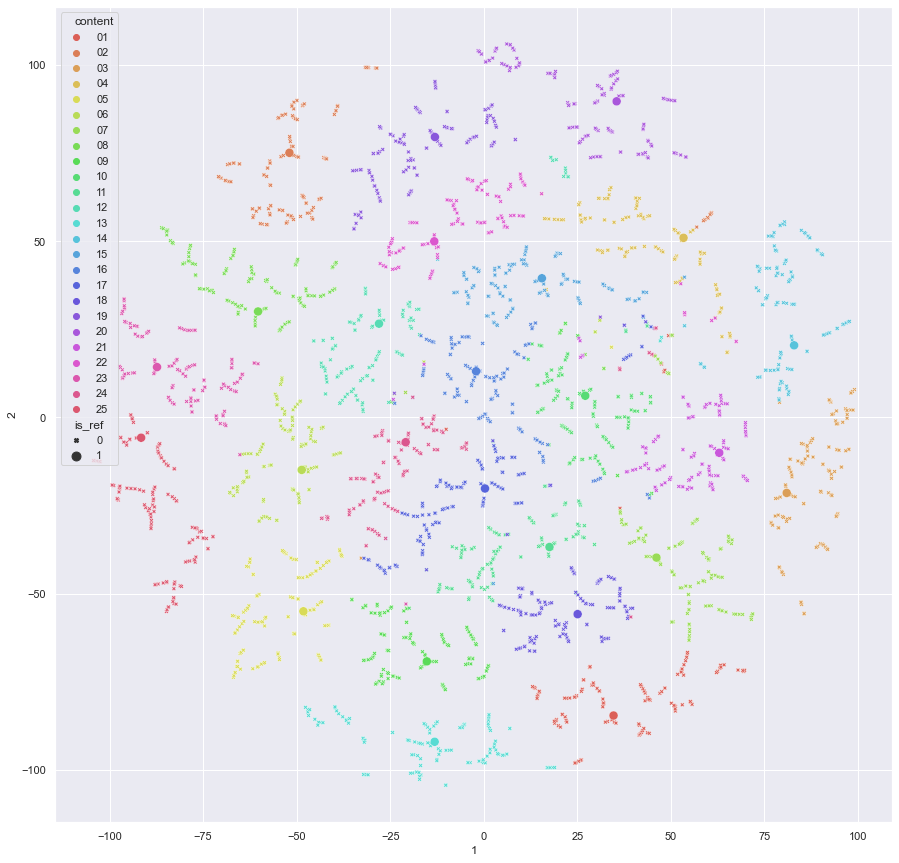

In [36]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

## QSE dsts

In [37]:
import numpy as np 

row = 3

features1 = []
contnts = []
is_ref = []
for c in dsts:
    
    imgs = get_images_dst(c)

    for i in range(len(imgs)):
        dd = iqa.get_QSE_features(imgs[i])[0]
        features1.append(dd)
        contnts.append(c)
        is_ref.append("0")

    if c == "25":
        continue
    ref = get_refs_content(c)[0]
    dd = iqa.get_QSE_features(ref)[0]
    features1.append(dd)
    contnts.append(c)
    is_ref.append("1")

  

    
    print(row)
    row +=1



features1 = np.array(features1)

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


<AxesSubplot:xlabel='1', ylabel='2'>

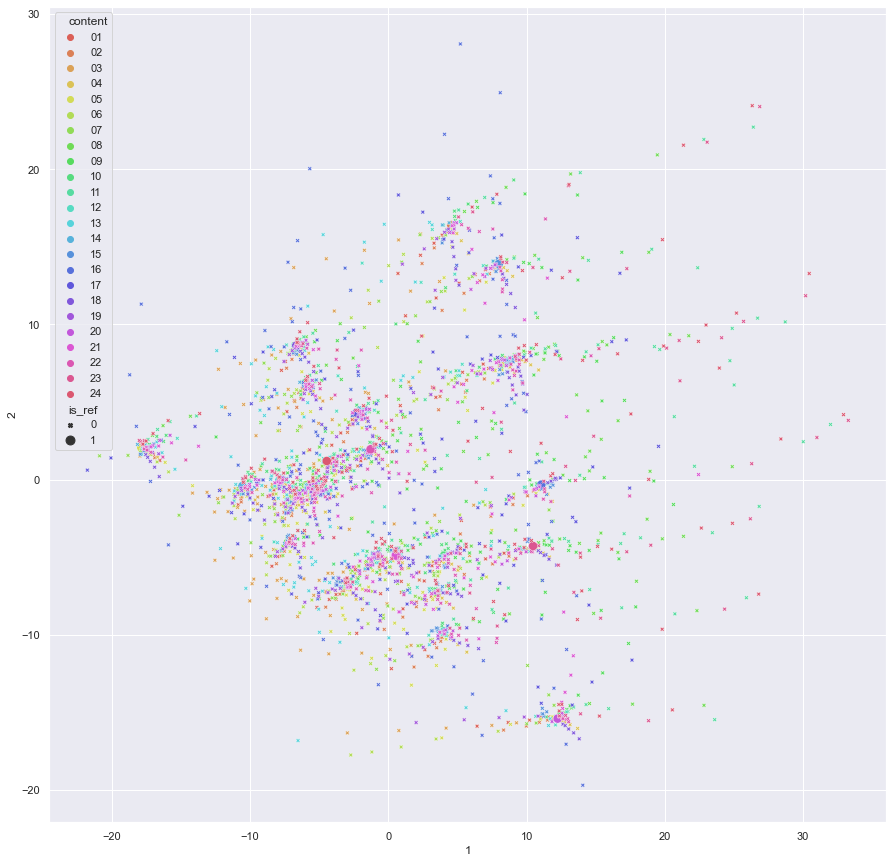

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

<AxesSubplot:xlabel='1', ylabel='2'>

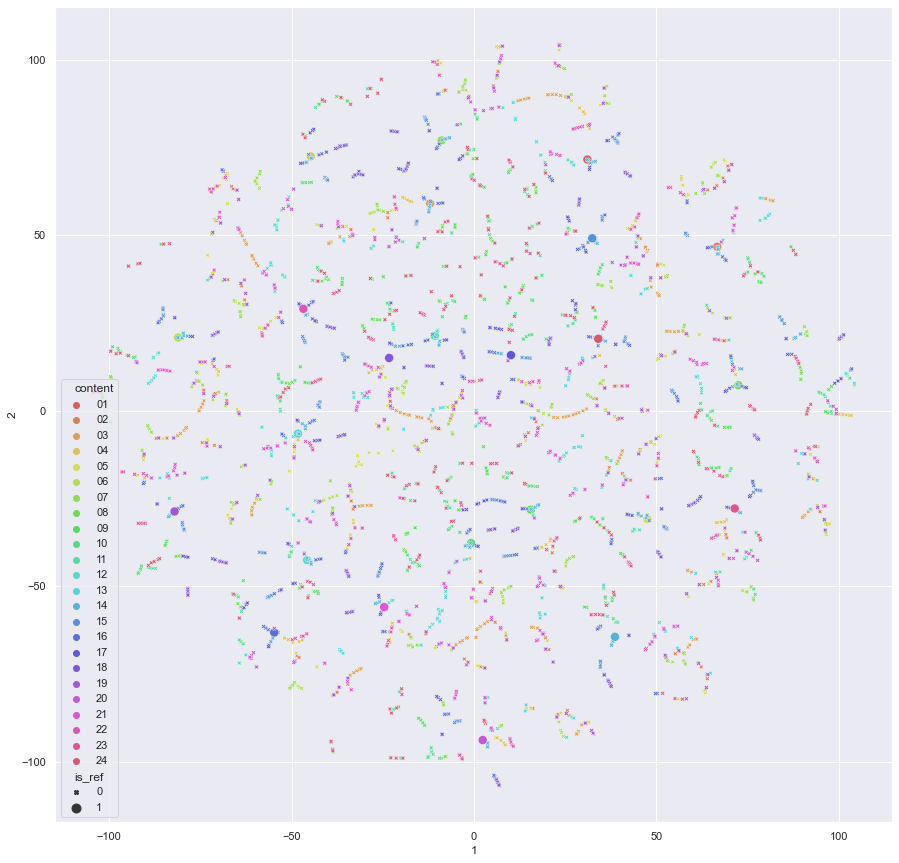

In [39]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

## qse feature afeter minus

In [42]:
import numpy as np 

row = 3

features1 = []
contnts = []
is_ref = []
for c in dsts:
    
    imgs = get_images_dst(c)
    refs = refs_for_dst


    for i in range(len(imgs)):
        dd = iqa.get_QSE_minus_DTE_features(imgs[i] , refs[i])[0]
        features1.append(dd)
        contnts.append(c)
        is_ref.append("0")

   
    
    print(row)
    row +=1


refs = glob.glob(TID_ADDR+'/reference_images/*')

for r in refs:
    dd = iqa.get_QSE_minus_DTE_features(r , r)[0]
    features1.append(dd)
    contnts.append("456")
    is_ref.append("1")


features1 = np.array(features1)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [43]:
features1.shape , len(contnts) , len(is_ref)

((3025, 256), 3025, 3025)

<AxesSubplot:xlabel='1', ylabel='2'>

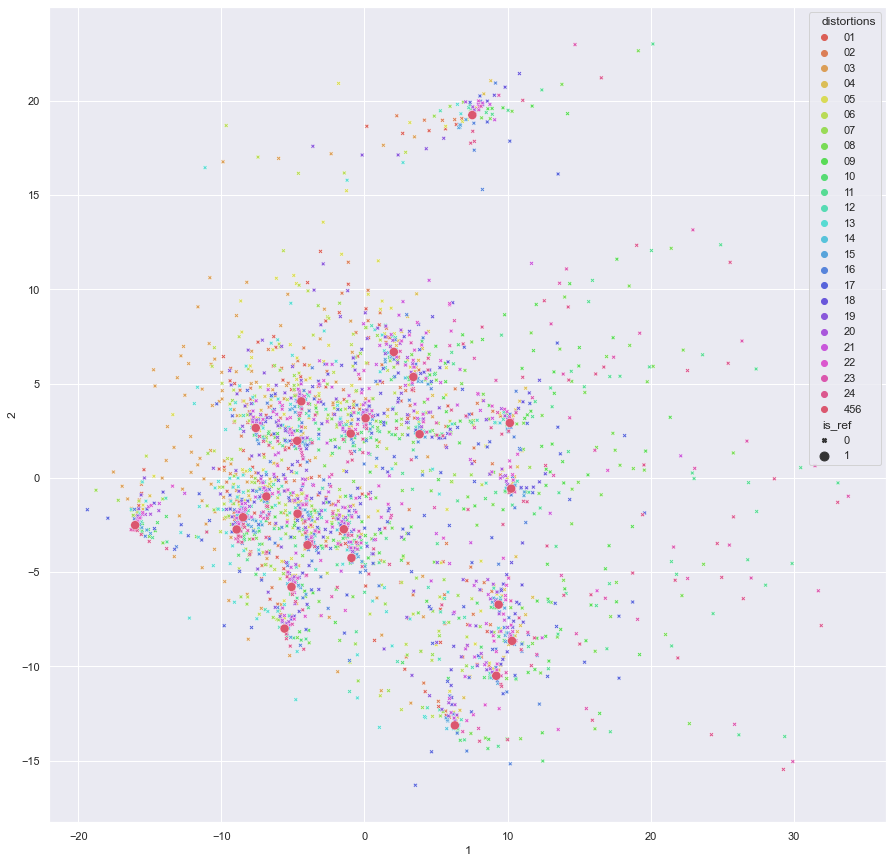

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'distortions':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='distortions',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

<AxesSubplot:xlabel='1', ylabel='2'>

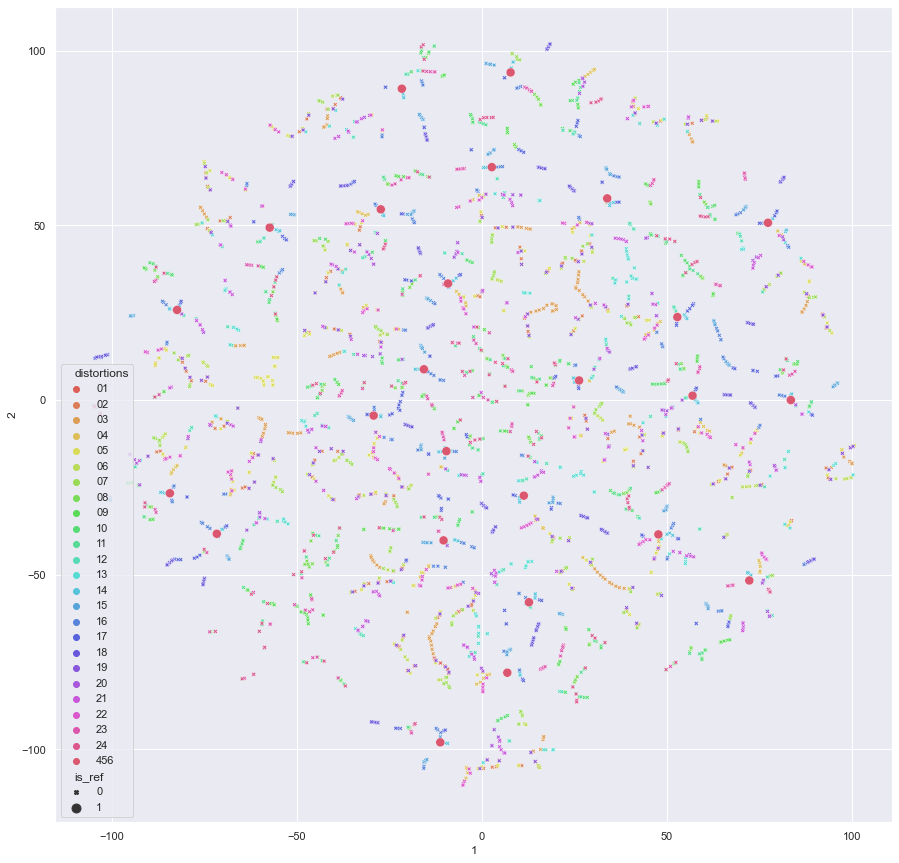

In [46]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'distortions':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='distortions',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

## QSE after minus content

In [47]:
import numpy as np 

row = 3

features1 = []
contnts = []
is_ref = []
for c in contents:
    
    imgs = get_images_content(c)
    refs = get_refs_content(c)


    for i in range(len(imgs)):
        dd = iqa.get_QSE_minus_DTE_features(imgs[i] , refs[i])[0]
        features1.append(dd)
        contnts.append(c)
        is_ref.append("0")

   
    
    print(row)
    row +=1


refs = glob.glob(TID_ADDR+'/reference_images/*')

for r in refs:
    dd = iqa.get_QSE_minus_DTE_features(r , r)[0]
    features1.append(dd)
    contnts.append("456")
    is_ref.append("1")


features1 = np.array(features1)

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


<AxesSubplot:xlabel='1', ylabel='2'>

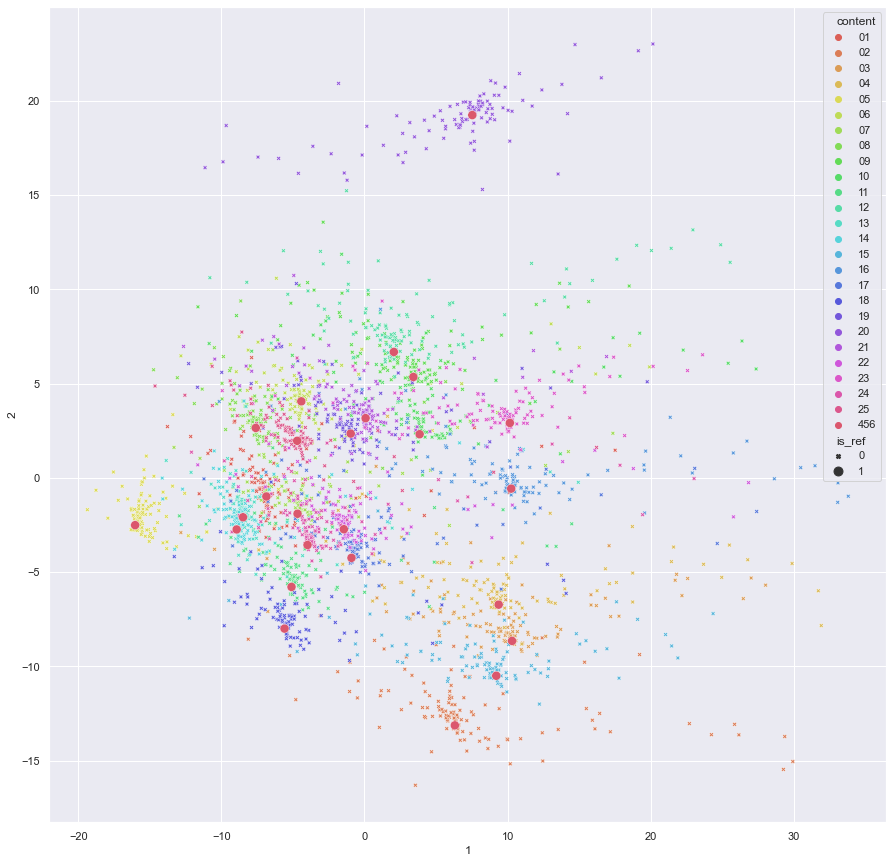

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

<AxesSubplot:xlabel='1', ylabel='2'>

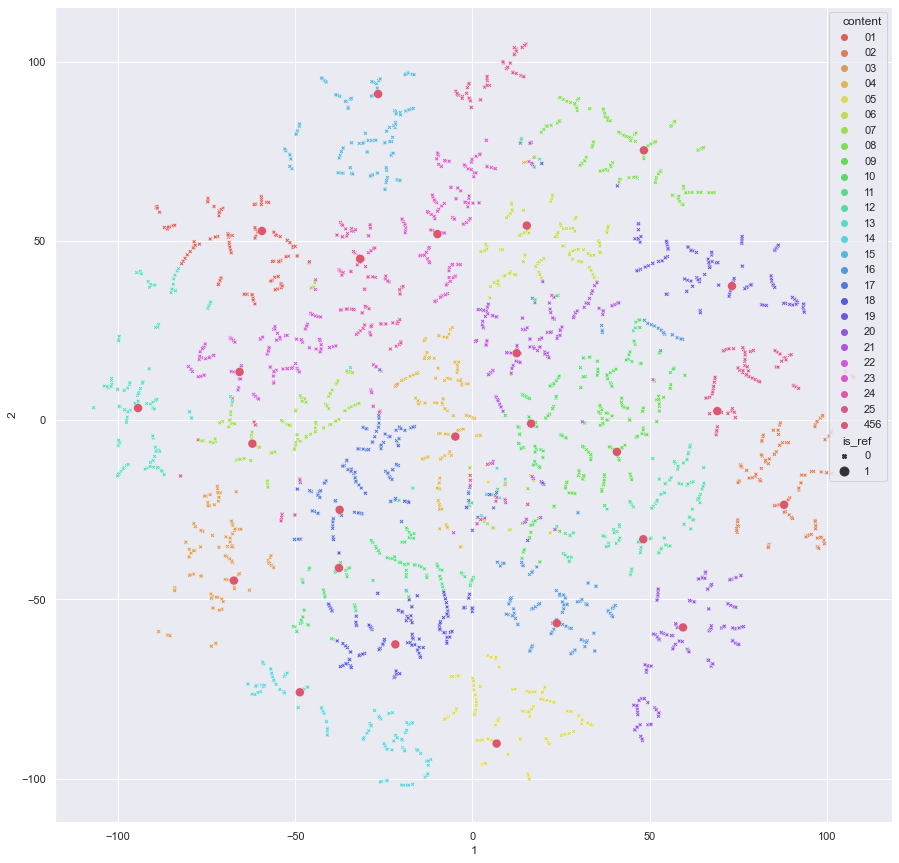

In [49]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

## VGG features 

In [61]:
import torch
from torchvision import models, transforms
from torch.autograd import Variable

# Load the pretrained model
model = models.vgg16(pretrained=True)

# Use the model object to select the desired layer
block4 = model.features[:24]

# Set the model to evaluation mode
block4.eval()



Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [64]:
from PIL import Image


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

block4 = block4.to(device)
block4.eval()

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the image
image = Image.open("images1/restored/3.png")

# Apply the transformations and add an extra dimension for the batch
image = transform(image).unsqueeze(0)

# Ensure we're doing this on CPU
image = image.to(device)

# Forward pass
output = block4(image)
output = torch.nn.functional.adaptive_max_pool2d(output, (1, 1))
# Print output
# print(output)

In [69]:
import torch
from torchvision import models, transforms
from torch.autograd import Variable
from PIL import Image

# Load the pretrained model
model = models.vgg16(pretrained=True)

# Use the model object to select the desired layer
block4 = model.features[:24]



def get_features_from_vgg_block_4(img_addr , block4 = block4):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    block4 = block4.to(device)
    block4.eval()

    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load the image
    image = Image.open(img_addr)

    # Apply the transformations and add an extra dimension for the batch
    image = transform(image).unsqueeze(0)

    # Ensure we're doing this on CPU
    image = image.to(device)

    # Forward pass
    output = block4(image)
    output = torch.nn.functional.adaptive_max_pool2d(output, (1, 1))

    output = torch.squeeze(output)

    # Convert the tensor to a numpy array
    output_np = output.cpu().detach().numpy()
    return output_np


    

In [71]:
get_features_from_vgg_block_4("images1/restored/3.png").shape

(512,)